# Convex Hull Algorithm - Graham Scan and Jarvis March
https://www.youtube.com/watch?v=B2AJoQSZf4M

In [1]:
import matplotlib.pyplot as plt

In [46]:
points = [(1, 2), (3, 3), (3, 1), (4, 5)]

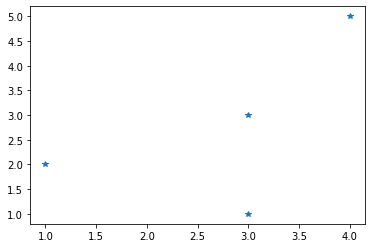

In [34]:
x, y = zip(*points)
plt.plot(x, y, '*')
plt.show()

* Convex Hull is a polygon that encloses all of the points.
* The vertices maximize the area while minimizing the circumference.

### Graham scan algorithm
* Select the point with the lowest Y coordinate. (By convention).

In [67]:
# Sort by the second element in the tuple.
points_sorted_by_y = sorted(points, key=lambda i: i[1])

In [68]:
points

[(1, 2), (3, 3), (3, 1), (4, 5)]

In [69]:
points_sorted_by_y

[(3, 1), (1, 2), (3, 3), (4, 5)]

* Sort the points by the angle relative to the bottom most point and the horizontal

In [52]:
from math import atan2, degrees

In [45]:
angle_list = []

In [61]:
def get_angle(point_1, point_2):
    angle = atan2(point_2[1] - point_1[1], point_2[0] - point_1[0])
    angle = degrees(angle)
    return angle 

In [63]:
point_0 = points_sorted_by_y[0]
for point in points_sorted_by_y:
    angle = get_angle(point_0, point)
    angle_list.append(angle)

In [70]:
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
points_sorted_by_angle = [x for _, x in sorted(zip(angle_list, points_sorted_by_y))]

In [66]:
points_sorted_by_angle

[(3, 1), (4, 5), (3, 3), (1, 2)]

* Iterate in sorted order, placing each point on a stack, but only if it makes a **counterclockwise** turn relative to the previous 2 points on the stack.
* Pop previous point off of the stack if making a **clockwise** turn.

In [72]:
convex_hull = []

for i in range(len(points_sorted_by_angle)-1):
    print(get_angle(points_sorted_by_angle[i], points_sorted_by_angle[i+1]))

75.96375653207353
-116.56505117707799
-153.434948822922


In [82]:
get_angle(points_sorted_by_angle[2], points_sorted_by_angle[1])

63.43494882292201